In [1]:
import numpy as np 
import pandas as pd
df = pd.read_csv('train.csv')
df = np.array(df)
np.random.shuffle(df)
train , test = np.split(df , [int(0.6*len(df))])
train = train.T
test = test.T

In [2]:
df


array([[8, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [5, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [3]:
y_train = train[0]
x_train = train[1:]
y_test = test[0]
x_test = test[1:]
x_normalised = x_train/255.0

In [4]:
def init(X):
    n , m = X.shape
    W1 = np.random.randn(16,784)
    W2 =  np.random.randn(10,16)
    b1 = np.random.randn(16 , m)
    b2 = np.random.randn(10,m)
    return W1 ,W2 , b1 , b2
def ReLu(Z):
    A = np.maximum(0, Z)
    return A
def sigmoid(Z):
    Z_max = np.maximum(0, Z) 
    A = Z_max + np.log(1 + np.exp(-np.abs(Z)))
    return np.exp(-np.abs(Z)) / (np.exp(-np.abs(Z)) + 1)
def softmax(Z):
    Z_max = np.max(Z, axis=0)
    Z_stable = Z - Z_max
    exp_Z = np.exp(Z_stable)
    return exp_Z / np.sum(exp_Z, axis=0)

def onehot(Y):
    num_classes = len(np.unique(Y))
    onehotY = np.eye(num_classes)[Y]
    return onehotY.T
def fprop(W1 , W2 , b1 , b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLu(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1 , A1 ,Z2 , A2
def backprop(X, Y, Z1, A1, Z2, A2, W1, W2, b1, b2, learning_rate):
    m = X.shape[1]
    
    dZ2 = A2 - Y
    dW2 = (1/m) * dZ2.dot(A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    
    dZ1 = W2.T.dot(dZ2) * (A1 > 0)
    dW1 = (1/m) * dZ1.dot(X.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
    
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    return W1, b1, W2, b2

def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size
def modeltrain(X , Y , iterations , lr):
    W1 , W2 , b1 , b2 = init(X)
    for i in range(iterations):
        Z1 , A1 , Z2 , A2 = fprop(W1 , W2 , b1 , b2 , X)
        onehotY = onehot(Y)
        W1 , b1 ,W2 ,b2 = backprop(X , onehotY , Z1 , A1 , Z2 , A2 , W1 , W2 ,b1 , b2,lr)
        if i % 50 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1 , W2   , b1,b2
    

In [5]:
W1 , W2  , b1 , b2 = modeltrain(x_normalised , y_train , 2000 , 0.8)

Iteration:  0
[7 1 1 ... 1 7 7] [8 2 0 ... 4 1 1]
0.14853174603174604
Iteration:  50
[6 9 0 ... 1 6 0] [8 2 0 ... 4 1 1]
0.24658730158730158
Iteration:  100
[6 3 0 ... 4 6 5] [8 2 0 ... 4 1 1]
0.3890873015873016
Iteration:  150
[6 2 2 ... 4 1 5] [8 2 0 ... 4 1 1]
0.47615079365079366
Iteration:  200
[6 2 8 ... 4 1 8] [8 2 0 ... 4 1 1]
0.5280952380952381
Iteration:  250
[6 2 8 ... 4 1 1] [8 2 0 ... 4 1 1]
0.5755555555555556
Iteration:  300
[8 2 8 ... 4 1 1] [8 2 0 ... 4 1 1]
0.609484126984127
Iteration:  350
[8 2 8 ... 4 1 1] [8 2 0 ... 4 1 1]
0.6475
Iteration:  400
[5 2 8 ... 4 1 1] [8 2 0 ... 4 1 1]
0.6715476190476191
Iteration:  450
[8 2 8 ... 4 1 1] [8 2 0 ... 4 1 1]
0.6994444444444444
Iteration:  500
[8 2 8 ... 4 1 1] [8 2 0 ... 4 1 1]
0.7261904761904762
Iteration:  550
[8 2 8 ... 4 1 1] [8 2 0 ... 4 1 1]
0.7501984126984127
Iteration:  600
[8 2 8 ... 4 1 1] [8 2 0 ... 4 1 1]
0.7737301587301587
Iteration:  650
[8 2 8 ... 4 1 1] [8 2 0 ... 4 1 1]
0.7446428571428572
Iteration:  700
[8 

In [6]:
from matplotlib import pyplot as plt

In [16]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = fprop(W1, W2, b1, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = x_train[:, index, None]
    prediction = make_predictions(x_normalised[:, index, None], W1, b1, W2, b2)
    label = y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [1 1 1 ... 1 1 1]
Label:  1


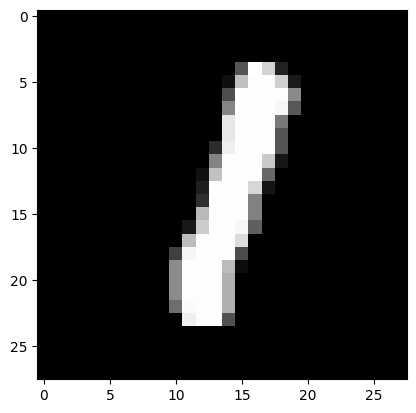

In [17]:
x_tnormal = x_test/255.0
test_prediction(941 , W1 , b1 , W2 , b2)

In [18]:
make_predictions(x_normalised, W1, b1, W2, b2)

array([8, 2, 8, ..., 4, 1, 1], dtype=int64)